# Problem Statement: 

Predict the health status of satellites based on telemetry data to enable proactive maintenance and ensure optimal performance in space missions.

# Stakeholders' Concerns 

1. Accurately predicting satellite health to minimize the risk of mission failures and optimize satellite usage.

2. Identifying the most critical factors that affect satellite health to focus on improving those aspects during the satellite design and maintenance process.

3. Reducing the rate of false positives and false negatives in predictions to avoid unnecessary maintenance efforts and ensure that actual issues are addressed promptly.

# Team Focus

1. Thoroughly exploring the data to understand the relationships between various telemetry variables and satellite health.

2. Ensuring the model is accurate and reliable by selecting appropriate algorithms, performing feature engineering, and validating the model's performance using relevant metrics.

3. Identifying and addressing any data quality issues, such as missing values and incorrect data.

4. Investigating the importance of each variable in the prediction task and communicating these insights to stakeholders for better decision-making

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy import stats

In [5]:
df = pd.read_csv(r"C:\Users\jeffd\Desktop\sat_health\notebook\data\sat_health.csv")

In [6]:
df.shape

(9000, 10)

In [7]:
df.head()

,time_since_launch,orbital_altitude,battery_voltage,solar_panel_temperature,attitude_control_error,data_transmission_rate,thermal_control_status,power_generation_rate,satellite_health_score,satellite_health
0,3174.0,1827.203968,28.633451,-13.074553,1.553314,10.600079,0.0,32.487089,0.450703,0.0
1,3507.0,1290.566449,21.591647,-15.568622,2.593412,47.291054,1.0,31.985029,1.413818,1.0
2,860.0,510.982525,20.150880,28.709230,2.680357,33.734476,1.0,36.540153,0.866808,1.0
3,1294.0,506.405339,24.492371,24.760467,3.853990,86.476290,1.0,20.378507,0.949472,1.0
4,1130.0,1525.925008,24.321029,-49.539970,2.589345,35.841325,0.0,20.952878,1.573683,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time_since_launch        9000 non-null   float64
 1   orbital_altitude         9000 non-null   float64
 2   battery_voltage          9000 non-null   float64
 3   solar_panel_temperature  9000 non-null   float64
 4   attitude_control_error   9000 non-null   float64
 5   data_transmission_rate   9000 non-null   float64
 6   thermal_control_status   9000 non-null   float64
 7   power_generation_rate    9000 non-null   float64
 8   satellite_health_score   9000 non-null   float64
 9   satellite_health         9000 non-null   float64
dtypes: float64(10)
memory usage: 703.2 KB


In [9]:
df.isnull().sum()

time_since_launch          0
orbital_altitude           0
battery_voltage            0
solar_panel_temperature    0
attitude_control_error     0
data_transmission_rate     0
thermal_control_status     0
power_generation_rate      0
satellite_health_score     0
satellite_health           0
dtype: int64

In [12]:
duplicates = df[df.duplicated()]
duplicates

,time_since_launch,orbital_altitude,battery_voltage,solar_panel_temperature,attitude_control_error,data_transmission_rate,thermal_control_status,power_generation_rate,satellite_health_score,satellite_health


In [13]:
# Iterate over the numerical columns
for col in df.select_dtypes(include=['int', 'float']):
    # Check the number of distinct values in the column
    num_distinct = df[col].nunique()
    
    # If the number of distinct values is less than 10, convert the column to categorical
    if num_distinct < 10:
        df[col] = df[col].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   time_since_launch        9000 non-null   float64 
 1   orbital_altitude         9000 non-null   float64 
 2   battery_voltage          9000 non-null   float64 
 3   solar_panel_temperature  9000 non-null   float64 
 4   attitude_control_error   9000 non-null   float64 
 5   data_transmission_rate   9000 non-null   float64 
 6   thermal_control_status   9000 non-null   category
 7   power_generation_rate    9000 non-null   float64 
 8   satellite_health_score   9000 non-null   float64 
 9   satellite_health         9000 non-null   category
dtypes: category(2), float64(8)
memory usage: 580.4 KB


In [15]:
df.describe()

,time_since_launch,orbital_altitude,battery_voltage,solar_panel_temperature,attitude_control_error,data_transmission_rate,power_generation_rate,satellite_health_score
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,1843.138444,1149.955415,24.977036,0.490299,2.481405,55.304423,24.967828,1.247454
std,1055.425573,490.268413,2.876452,28.872107,1.442884,25.918931,6.867755,0.605035
min,0.000000,300.201696,20.000093,-49.997948,0.000512,10.008394,1.748853,-1.030065
25%,929.750000,734.885352,22.477614,-24.218664,1.248338,32.954044,20.148523,0.838224
50%,1851.500000,1153.111525,24.937483,0.947284,2.466188,55.351346,24.969957,1.243841
75%,2773.000000,1569.554820,27.449150,25.494865,3.726619,77.801120,29.732674,1.662911
max,3648.000000,1999.743716,29.998927,49.997387,4.999498,99.982808,46.463277,3.336137


In [18]:
df.value_counts()

time_since_launch  orbital_altitude  battery_voltage  solar_panel_temperature  attitude_control_error  data_transmission_rate  thermal_control_status  power_generation_rate  satellite_health_score  satellite_health
0.0                1081.121612       25.992389         27.824989               4.969135                61.355616               0.0                     21.130382              1.334847                1.0                 1
2461.0             1579.204255       25.858822        -18.671228               0.085198                42.606811               1.0                     28.548255              1.117618                1.0                 1
2459.0             1320.430156       20.296572         12.180670               3.753329                25.326981               0.0                     32.424717              0.633480                1.0                 1
2460.0             752.288268        25.871111         25.598314               0.538884                36.719411             

In [19]:
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in df.columns if df[col].dtype.name == 'category']
num_df = df[num_cols]
cat_df = df[cat_cols]

In [17]:
def des_viz(subset_df, column_names):
    for column_name in column_names:
        # Compute descriptive statistics and skewness
        stats = subset_df[column_name].describe().to_frame()
        stats.loc['skewness'] = subset_df[column_name].skew()

        # Print the statistics
        print(f"Descriptive Statistics for {column_name}:")
        print(stats)

        # Create subplots with Seaborn
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

        # Create the boxplot on the left subplot
        sns.boxplot(x=column_name, data=subset_df, ax=ax1)
        ax1.set_title(f'Boxplot for {column_name}')

        # Create the histogram on the right subplot
        sns.histplot(x=column_name, data=subset_df, bins=15, ax=ax2)
        ax2.set_title(f'Histogram for {column_name}')

        plt.subplots_adjust(wspace=0.3)

        # Display the visualizations
        plt.show()

Descriptive Statistics for time_since_launch:
          time_since_launch
count           9000.000000
mean            1843.138444
std             1055.425573
min                0.000000
25%              929.750000
50%             1851.500000
75%             2773.000000
max             3648.000000
skewness          -0.009992


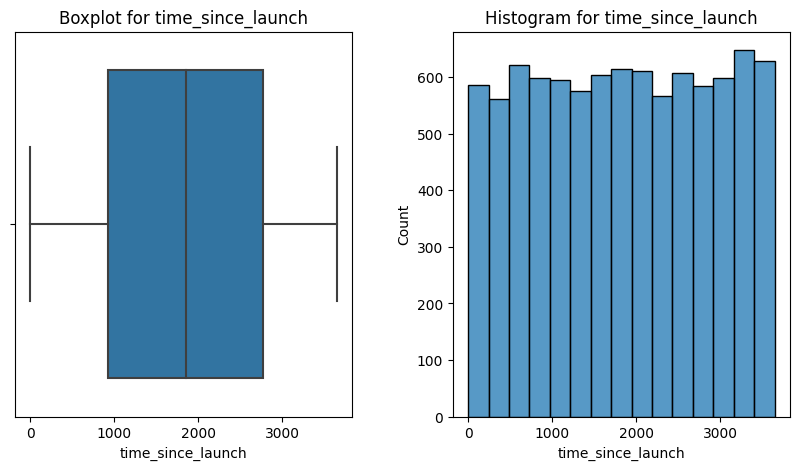

Descriptive Statistics for orbital_altitude:
          orbital_altitude
count          9000.000000
mean           1149.955415
std             490.268413
min             300.201696
25%             734.885352
50%            1153.111525
75%            1569.554820
max            1999.743716
skewness         -0.013520


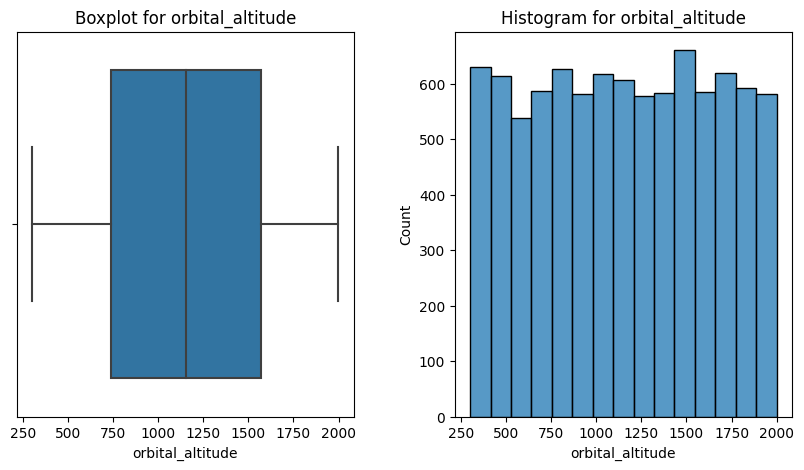

Descriptive Statistics for battery_voltage:
          battery_voltage
count         9000.000000
mean            24.977036
std              2.876452
min             20.000093
25%             22.477614
50%             24.937483
75%             27.449150
max             29.998927
skewness         0.032068


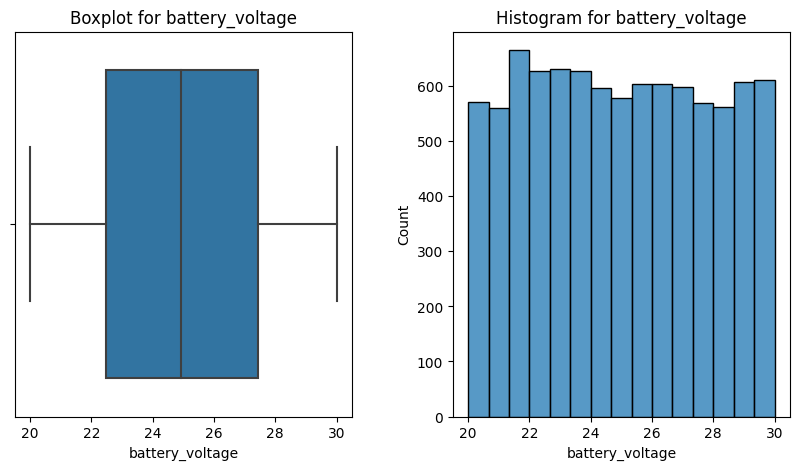

Descriptive Statistics for solar_panel_temperature:
          solar_panel_temperature
count                 9000.000000
mean                     0.490299
std                     28.872107
min                    -49.997948
25%                    -24.218664
50%                      0.947284
75%                     25.494865
max                     49.997387
skewness                -0.035040


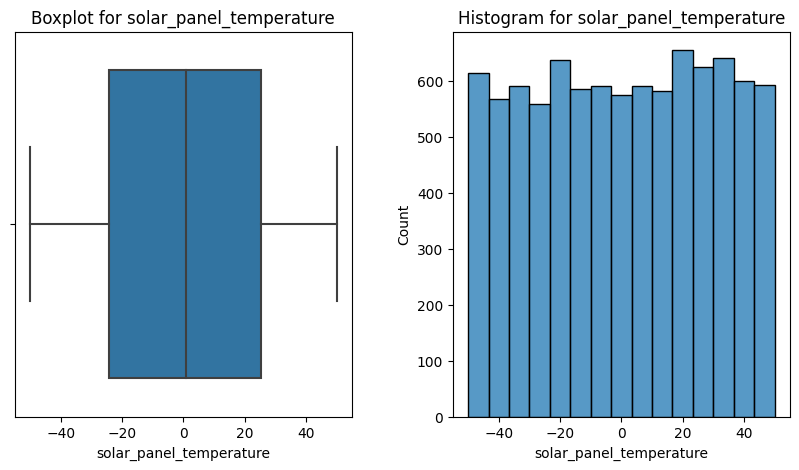

Descriptive Statistics for attitude_control_error:
          attitude_control_error
count                9000.000000
mean                    2.481405
std                     1.442884
min                     0.000512
25%                     1.248338
50%                     2.466188
75%                     3.726619
max                     4.999498
skewness                0.032699


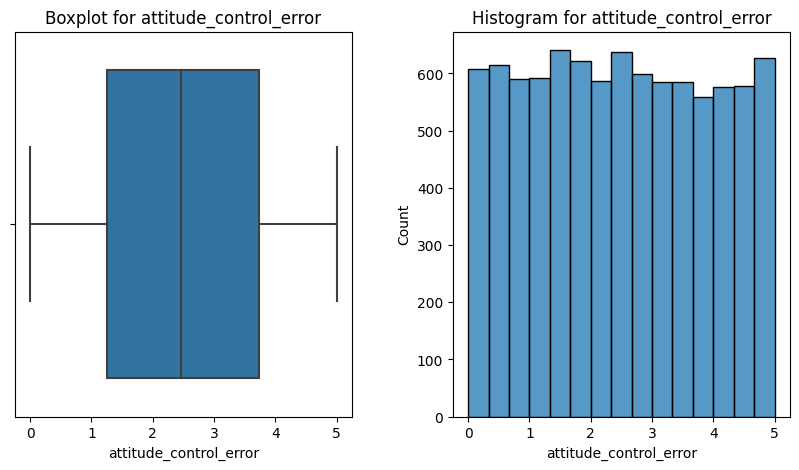

Descriptive Statistics for data_transmission_rate:
          data_transmission_rate
count                9000.000000
mean                   55.304423
std                    25.918931
min                    10.008394
25%                    32.954044
50%                    55.351346
75%                    77.801120
max                    99.982808
skewness               -0.010478


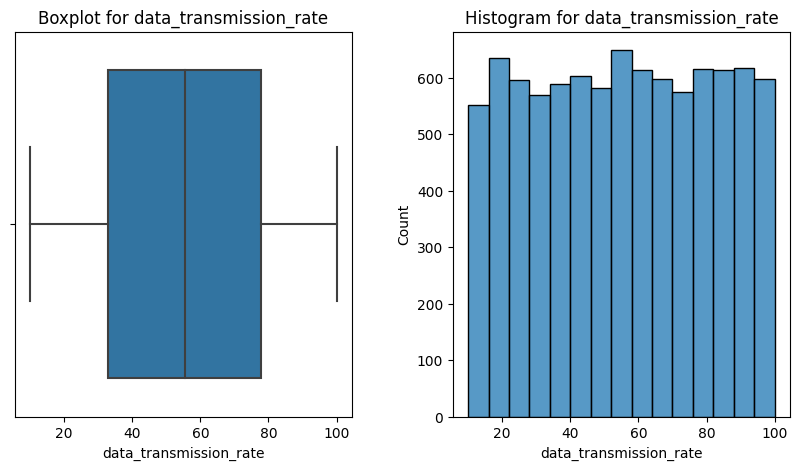

Descriptive Statistics for power_generation_rate:
          power_generation_rate
count               9000.000000
mean                  24.967828
std                    6.867755
min                    1.748853
25%                   20.148523
50%                   24.969957
75%                   29.732674
max                   46.463277
skewness              -0.001094


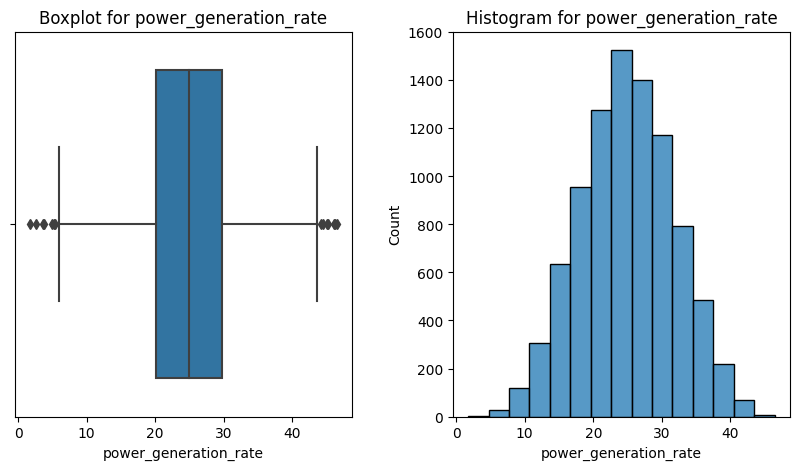

Descriptive Statistics for satellite_health_score:
          satellite_health_score
count                9000.000000
mean                    1.247454
std                     0.605035
min                    -1.030065
25%                     0.838224
50%                     1.243841
75%                     1.662911
max                     3.336137
skewness                0.012926


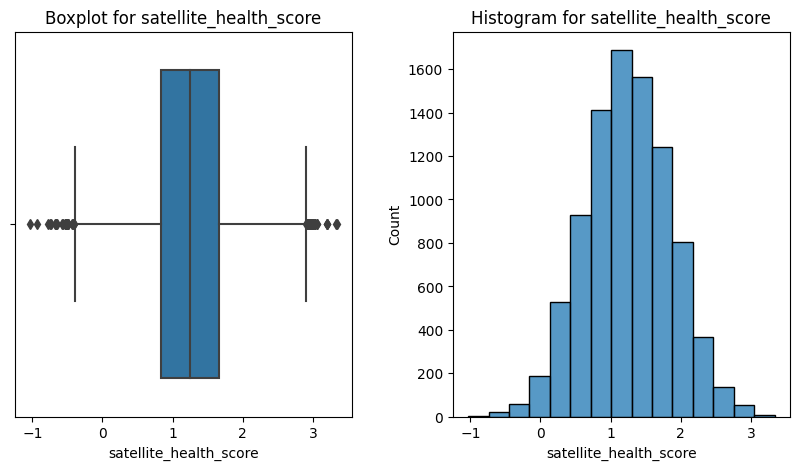

In [20]:
des_viz(df,num_cols)

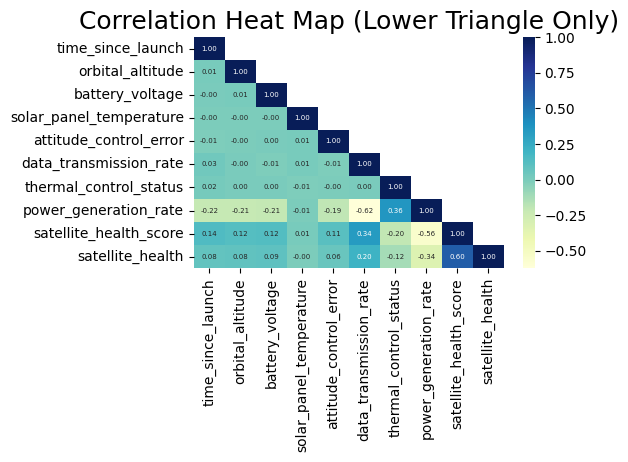

In [31]:
# Create correlation matrix
corr = df.corr()

# Create mask for lower triangle
mask = np.triu(np.ones_like(corr), k=1)

# Create correlation heat map with lower triangle only
plt.figure(figsize=(5,3))
sns.heatmap(corr, cmap='YlGnBu', annot=True, annot_kws={'size': 5}, fmt='.2f', mask=mask)
plt.title('Correlation Heat Map (Lower Triangle Only)', fontsize=18)
plt.show()

# Class Imbalance Issue 

There is significant class imbalance. Will implement SMOTE meaures. 

In [25]:
df['satellite_health'].value_counts()

satellite_health
1.0    8004
0.0     996
Name: count, dtype: int64

In [26]:
df['thermal_control_status'].value_counts()

thermal_control_status
1.0    4558
0.0    4442
Name: count, dtype: int64